In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import copy

In [58]:
X = {}
Y = {}
for i in range(20):
    X[i] = np.random.randint(0, 80)
    Y[i] = np.random.randint(0, 80)


df = pd.DataFrame({
    'x' : X,
    'y' : Y
})
print(df)

     x   y
0   31  56
1   22  44
2   32   4
3   66  25
4   40  62
5   16  53
6    9  59
7   20  78
8   20   1
9   65  44
10  12  49
11  17  14
12   9  33
13  31  17
14  75  10
15  50  46
16  63  70
17  19  79
18  42  10
19  35  15


{1: [50, 40], 2: [44, 35], 3: [20, 67]}


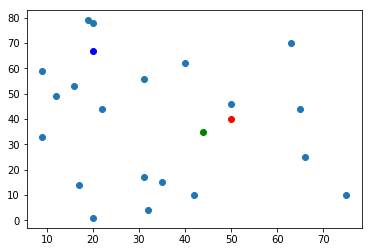

In [59]:
k = 3
centroids = {}
for i in range(k):
    centroids[i+1] = [np.random.randint(0,80), np.random.randint(0, 80)]

print(centroids)
plt.scatter(df['x'], df['y'])
colormap = { 1 : 'r', 2 : 'g', 3: 'b'}

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colormap[i])

In [60]:
col = []
for i in range(k):
    col.append('{}'.format(i+1))
print(col)
def assignment():
    for i in centroids.keys():
        df['{}'. format(i)] = np.sqrt((df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2 )
        df['closest'] = df.loc[:, col].idxmin(axis = 1)
        df['closest'] = df['closest'].map(lambda x : int(x))
        df['color'] = df['closest'].map(lambda x : colormap[x])
assignment()
print(df)

['1', '2', '3']
     x   y          1  closest color          2          3
0   31  56  24.839485        3     b  24.698178  15.556349
1   22  44  28.284271        3     b  23.769729  23.086793
2   32   4  40.249224        2     g  33.241540  64.132675
3   66  25  21.931712        1     r  24.166092  62.289646
4   40  62  24.166092        3     b  27.294688  20.615528
5   16  53  36.400549        3     b  33.286634  14.560220
6    9  59  45.188494        3     b  42.438190  13.601471
7   20  78  48.414874        3     b  49.244289  11.000000
8   20   1  49.203658        2     g  41.617304  66.000000
9   65  44  15.524175        1     r  22.847319  50.537115
10  12  49  39.051248        3     b  34.928498  19.697716
11  17  14  42.011903        2     g  34.205263  53.084838
12   9  33  41.593269        2     g  35.057096  35.735137
13  31  17  29.832868        2     g  22.203603  51.195703
14  75  10  39.051248        1     r  39.824616  79.208585
15  50  46   6.000000        1     r  12

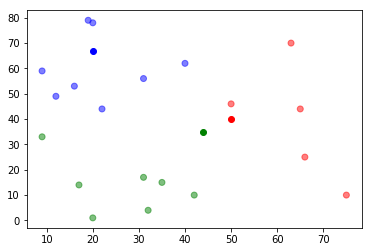

In [61]:
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5)

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colormap[i])

In [62]:
def update():
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i] ['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i] ['y'])
        
update()

print(centroids)

{1: [63.8, 39.0], 2: [26.571428571428573, 13.428571428571429], 3: [21.125, 60.0]}


In [63]:
while True:
    lastclosest = df['closest'].copy(deep = True)
    
    update()
    assignment()
    if lastclosest.equals(df['closest']):
        break


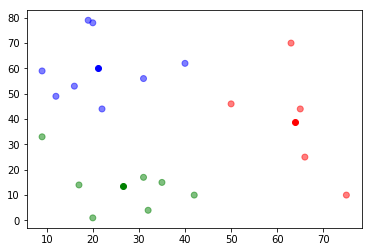

In [64]:
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.5)

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colormap[i])